In [1]:
import cv2
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Setting Path
path=".\\Diabetic Retina"
DATASET_PATH = '.\\Diabetic Retina\DR_Classify'
dr_cls = ['0', '1','2', '3','4']

In [3]:
#Read train csv file
trainSample = pd.read_csv(path+"/"+"trainLabels.csv")

In [4]:
trainSample.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [5]:
# function to visualize sample images by classes
def visualize_classes():
    idx=0
    plt.figure(figsize=(16, 12))
    for cls in range(0, len(dr_cls)):
        sample_image = random.sample(range(0, len(trainSample[trainSample['level']==cls])), 3)
        dr_path = DATASET_PATH+"\\"+dr_cls[cls]+"\\*"
        dr_path = glob.glob(dr_path)
        for sm in sample_image:
            plt.subplot(5,3, idx+1)
            image = cv2.imread(dr_path[sm])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            plt.title(f"Class: {cls}", fontsize=12)
            plt.axis("off")
            idx=idx+1
        sample_image.clear()

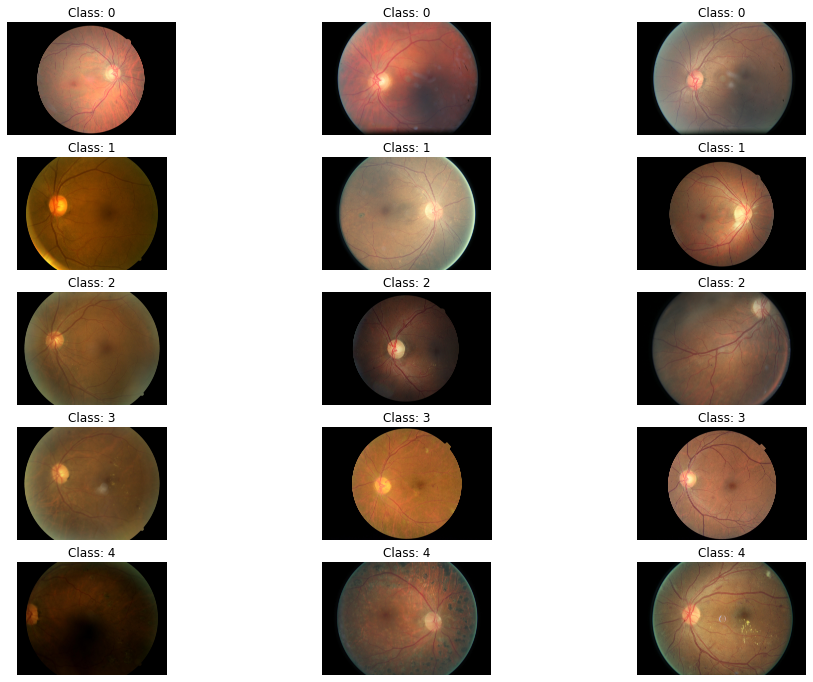

In [6]:
visualize_classes()

In [7]:
# func to define subplot of images
def sub_plt(img,title,row,col):
    plt.figure(figsize=(16, 12))
    idx=0
    for im in range(0,row*col):
        plt.subplot(row,col,idx+1)
        plt.title(title[im], fontsize=12)
        plt.imshow(img[im])
        idx=idx+1
    

In [8]:
rn = random.sample(range(0, len(trainSample[trainSample['level']==0])), 1)
print(rn)

[24271]


In [9]:
# Accessing image through glob
dr_path = os.path.join(DATASET_PATH,dr_cls[4],'*')

print(dr_path)
# glob through the directory (returns a list of all file paths)
dr_path = glob.glob(dr_path)
print(dr_path[3]) # access an individual file

.\Diabetic Retina\DR_Classify\4\*
.\Diabetic Retina\DR_Classify\4\10193_right.jpeg


In [10]:
image_read = cv2.imread(dr_path[35])
print(image_read.dtype)

uint8


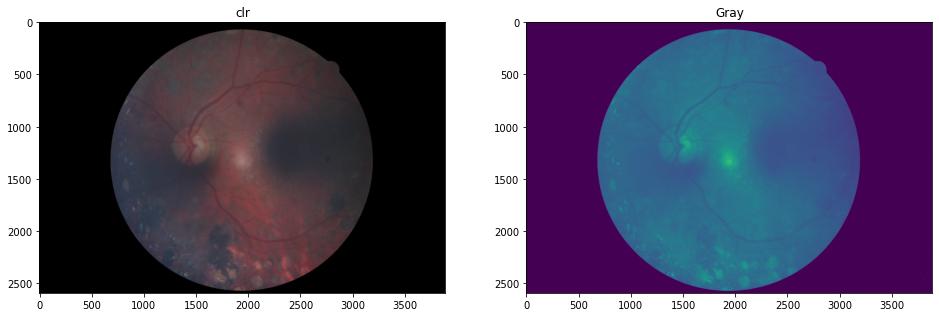

In [11]:
# Conversion to Gray Image
image_clr = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_clr, cv2.COLOR_BGR2GRAY)

image= [image_clr,image_gray]
title = ["clr" , "Gray"]

sub_plt(image,title,1,2)

In [13]:
image_lab = cv2.cvtColor(image_read, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(image_lab)

image_clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

lab_planes[0] = image_clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

image_rgb_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

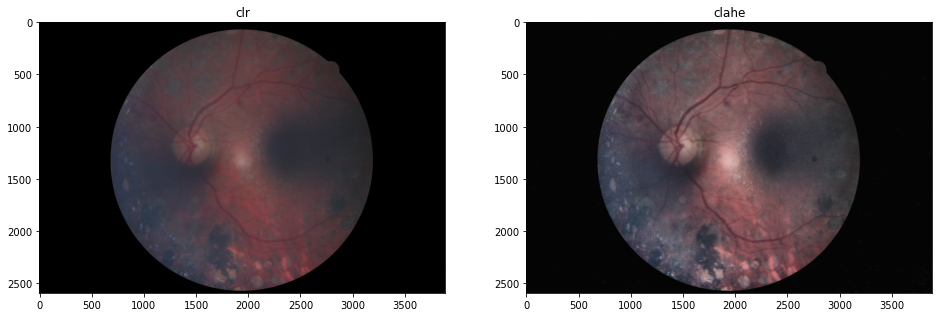

In [15]:
image= [image_clr,image_rgb_clahe]
title = ["clr" , "clahe"]
sub_plt(image,title,1,2)

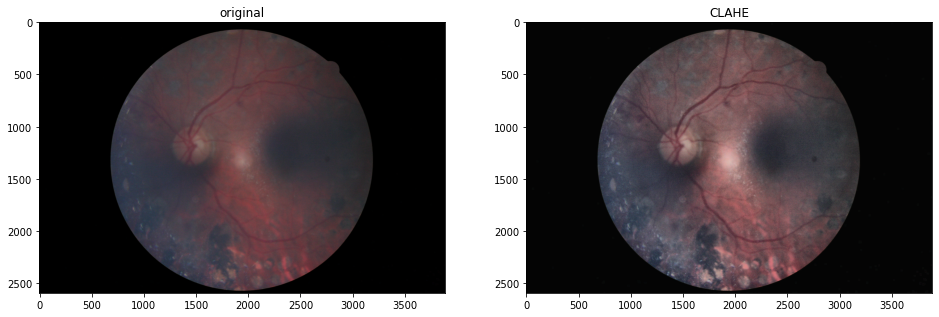

In [16]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(image_gray)

image= [image_clr,image_rgb_clahe]
title = ["original" , "CLAHE"]

sub_plt(image,title,1,2)

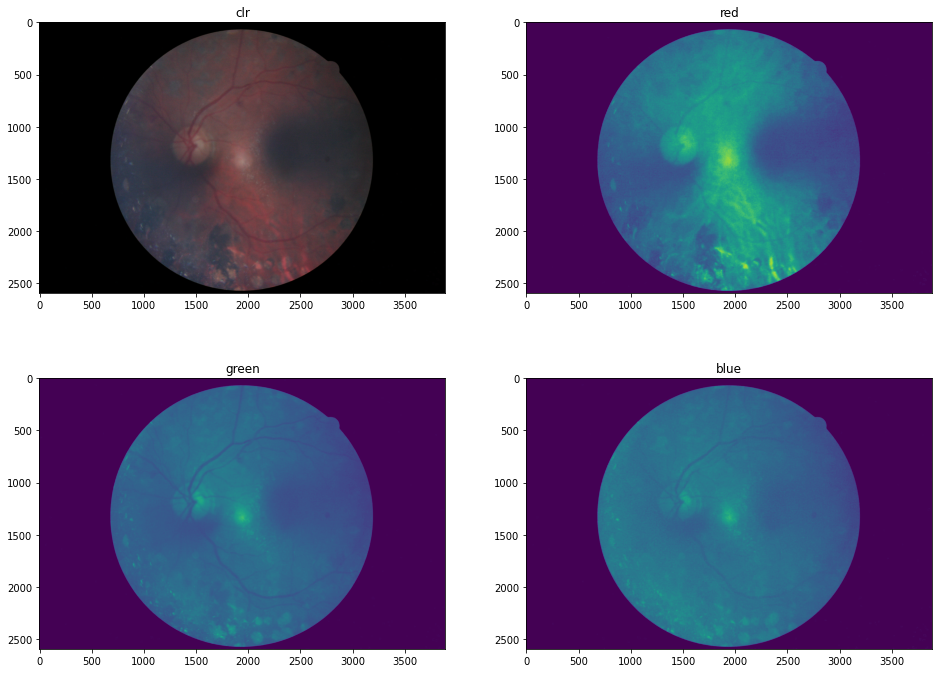

In [18]:
# Channels Red, Green and Blue
image_red = image_clr[:,:,0]
image_green = image_clr[:,:,1]
image_blue = image_clr[:,:,2]

image = [image_clr, image_red,image_green, image_blue]
title = ["clr","red","green","blue"]

sub_plt(image,title,2,2)

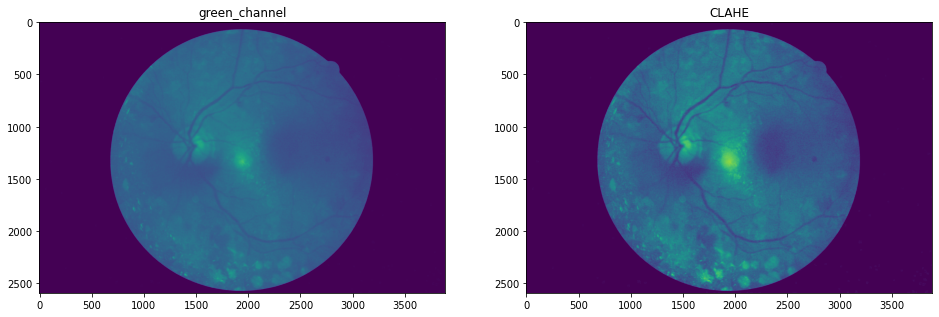

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(image_green)

image= [image_green,img_clahe]
title = ["green_channel" , "CLAHE"]

sub_plt(image,title,1,2)

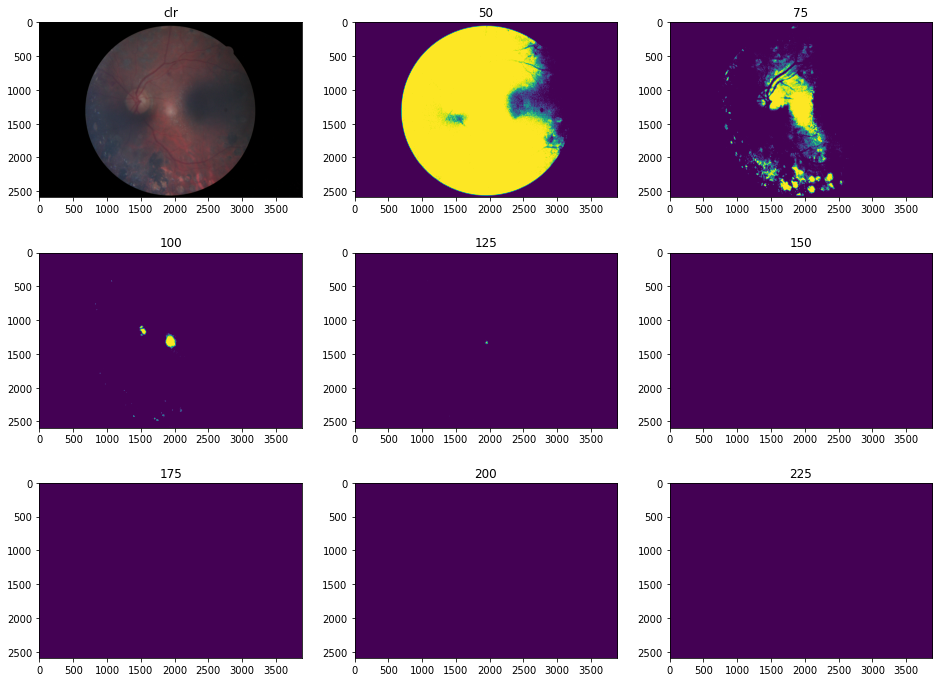

In [21]:
# Image thresholding
set_enum = cv2.THRESH_BINARY

ret,thresh1 = cv2.threshold(image_gray,50,255,set_enum)
ret,thresh2 = cv2.threshold(image_gray,75,255,set_enum)
ret,thresh3 = cv2.threshold(image_gray,100,255,set_enum)
ret,thresh4 = cv2.threshold(image_gray,125,255,set_enum)
ret,thresh5 = cv2.threshold(image_gray,150,255,set_enum)
ret,thresh6 = cv2.threshold(image_gray,175,255,set_enum)
ret,thresh7 = cv2.threshold(image_gray,200,255,set_enum)
ret,thresh8 = cv2.threshold(image_gray,225,255,set_enum)

image = [image_clr,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7,thresh8]
title = ["clr" , 50, 75,100,125,150,175,200,225]


sub_plt(image,title,3,3)

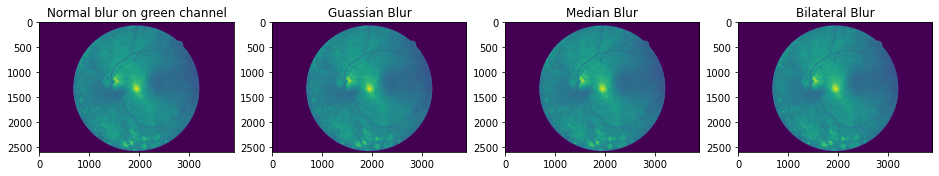

In [22]:
#Comparing noise removal techniques on green channel of image
guassian_blur_green = cv2.GaussianBlur(image_green,(5,5),0)
blur_green = cv2.blur(image_green,(5,5),0)
medianBlur_green = cv2.medianBlur(image_green,5)
bilateralFilter_green = cv2.bilateralFilter(image_green,9,75,75)

image = [blur_green, guassian_blur_green, medianBlur_green, bilateralFilter_green ]
title = ["Normal blur on green channel", "Guassian Blur", "Median Blur", "Bilateral Blur"]
sub_plt(image,title,1,4)

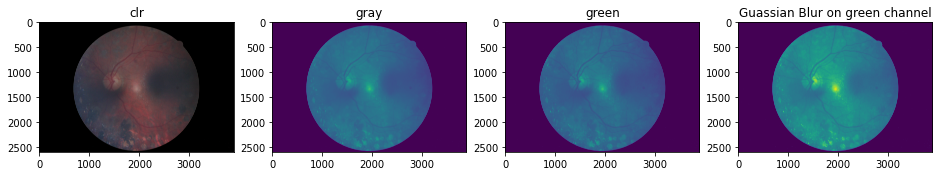

In [24]:
#Comparing original with green/gray/guassian blur preprocessing
image = [image_clr, image_gray, image_green, guassian_blur_green]
title = ["clr", "gray", "green", "Guassian Blur on green channel"]

sub_plt(image,title,1,4)

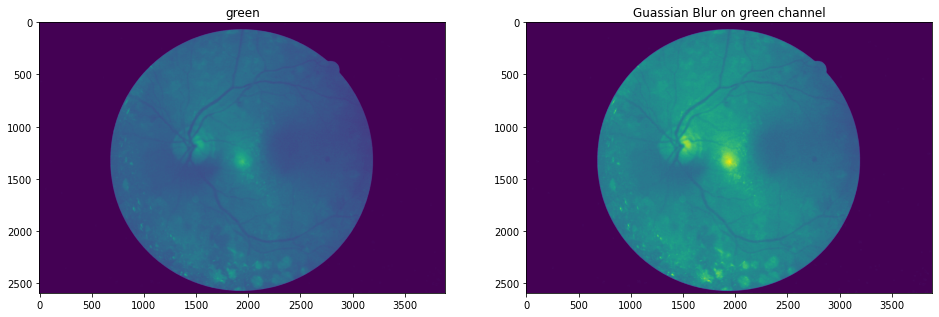

In [26]:
image = [ image_green, guassian_blur_green]
title = [ "green", "Guassian Blur on green channel"]
sub_plt(image,title,1,2)

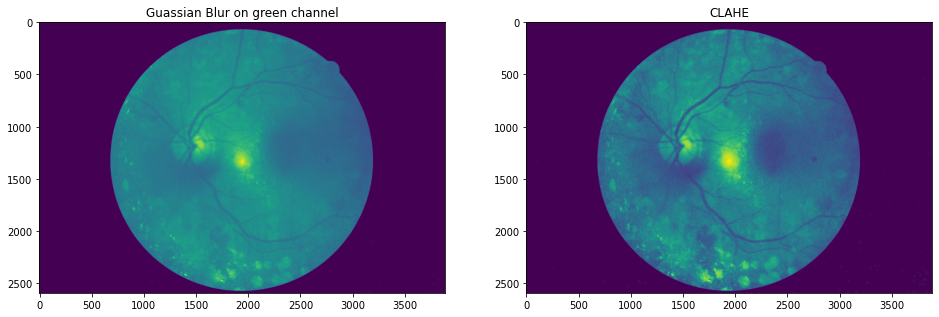

In [28]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(guassian_blur_green)

image= [guassian_blur_green,img_clahe]
title = ["Guassian Blur on green channel" , "CLAHE"]

sub_plt(image,title,1,2)

# Conclusions
Green is better than gray in showing vessels.
Guassian/Bilateral blur on green channel gives more crisp image
Applying Guassian blur on green channel is recommended.
Applying CLAHE on Green channel and channel merging
Final Outcome - GUassian Blur + Clahe